<p><font face="consolas" size="3" color="blue"><b>_____________________________________________________________________________________________________________________________________________________________________</b>
</font></p>

<p><font face="consolas" size="3" color="blue">
<center><b>*</b></center></font></p>

In [1]:
__author__ = 'Eslem Karakas'

<p><font face="consolas" size="3" color="blue">
<center><b>*</b></center></font></p>

In [2]:
import numpy as np
import scipy as sc
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib as plt

<p><font face="consolas" size="3" color="blue">
<center><b>*</b></center></font></p>

In [3]:
pd.options.mode.chained_assignment = None 

<p><font face="consolas" size="3" color="blue">
<center><b>*</b></center></font></p>

In [4]:
press = pd.read_excel('press.xlsx')
parqeut = pd.read_excel('parquet.xlsx')
colleration = pd.read_excel('press_parquet.xlsx')

<p><font face="consolas" size="3" color="blue">
<center><b>*</b></center></font></p>

In [5]:
# copy dataset for creating backdoor
fdf = press.copy()
sdf = parqeut.copy()
cdf = colleration.copy()

<p><font face="consolas" size="3" color="orange"><b>_____________________________________________________________________________________________________________________________________________________________________</b>
</font></p>

<p><font face="consolas" size="3" color="orange">
<center><b>*</b></center></font></p>

In [6]:
# working on downtime
def calculation(x,y,z):
    """
    x: planned downtime
    y: unplanned downtime
    z: producing power
    """
    a = (86400*x)/100
    b = ((86400-a)*y)/100
    c = 86400-(a+b)
    d = (c*z)/3600
    e = 86400/d
    
    print('planned downtime duration: {}sn'.format(round(a,2)))
    print('unplanned downtime duration: {}sn'.format(round(b,2)))
    print('active running time: {}sn'.format(round(c,2)))
    print('producing power in active running time: {} unit'.format(round(d,2)))
    print('producing time for one: {}sn'.format(round(e,2)))

counter = 1
press_value = [[4,23,370],[11,26,250],[6,16,375],[24,40,375]]
parquet_value = [[16,43,335],[19,33,416],[21,43,355]]

for i in press_value:
    print('PRESS-{}'.format(counter))
    counter += 1
    calculation(i[0],i[1],i[2])
    print()

counter=1
for i in parquet_value:
    print('PARQUET-{}'.format(counter))
    counter += 1
    calculation(i[0],i[1],i[2])
    print()

PRESS-1
planned downtime duration: 3456.0sn
unplanned downtime duration: 19077.12sn
active running time: 63866.88sn
producing power in active running time: 6564.1 unit
producing time for one: 13.16sn

PRESS-2
planned downtime duration: 9504.0sn
unplanned downtime duration: 19992.96sn
active running time: 56903.04sn
producing power in active running time: 3951.6 unit
producing time for one: 21.86sn

PRESS-3
planned downtime duration: 5184.0sn
unplanned downtime duration: 12994.56sn
active running time: 68221.44sn
producing power in active running time: 7106.4 unit
producing time for one: 12.16sn

PRESS-4
planned downtime duration: 20736.0sn
unplanned downtime duration: 26265.6sn
active running time: 39398.4sn
producing power in active running time: 4104.0 unit
producing time for one: 21.05sn

PARQUET-1
planned downtime duration: 13824.0sn
unplanned downtime duration: 31207.68sn
active running time: 41368.32sn
producing power in active running time: 3849.55 unit
producing time for one: 2

<p><font face="consolas" size="3" color="red"><b>_____________________________________________________________________________________________________________________________________________________________________</b>
</font></p>

<p><font face="consolas" size="3" color="red">
<center><b>*</b></center></font></p>

In [7]:
sdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 5 columns):
a_code      136 non-null object
demand      136 non-null float64
parquet1    161 non-null float64
parquet2    161 non-null float64
parquet3    161 non-null float64
dtypes: float64(4), object(1)
memory usage: 6.4+ KB


<p><font face="consolas" size="3" color="red">
<center><b>*</b></center></font></p>

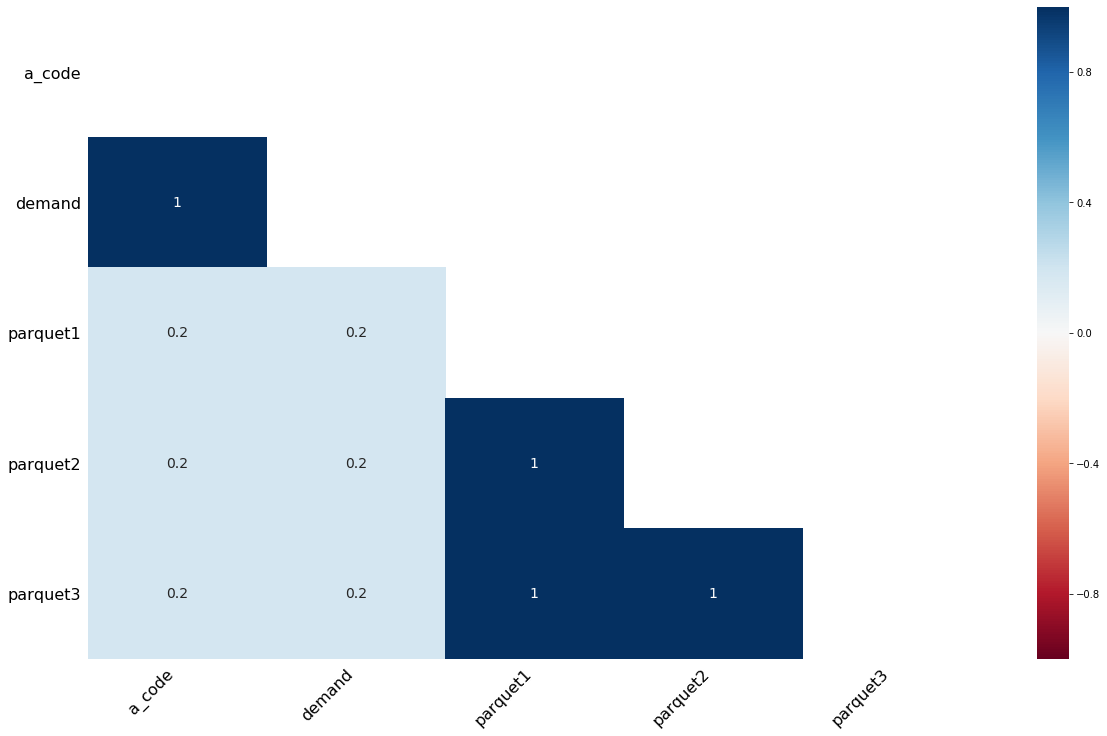

In [8]:
msno.heatmap(sdf);

<p><font face="consolas" size="3" color="red">
<center><b>*</b></center></font></p>

In [9]:
sdf.head()

,a_code,demand,parquet1,parquet2,parquet3
0,A1,1000.0,362.5,0.0,0.0
1,A2,1000.0,362.5,0.0,0.0
2,A3,1000.0,362.5,0.0,0.0
3,A4,1000.0,362.5,0.0,0.0
4,NaN,NaN,0.0,0.0,0.0


In [10]:
sdf.tail()

,a_code,demand,parquet1,parquet2,parquet3
157,A158,1500.0,375.0,416.666667,375.0
158,A159,1500.0,375.0,416.666667,375.0
159,A160,1500.0,375.0,416.666667,375.0
160,A161,1500.0,375.0,416.666667,375.0
161,NaN,NaN,0.0,0.000000,0.0


<p><font face="consolas" size="3" color="red">
<center><b>*</b></center></font></p>

In [11]:
f_product = list(sdf['a_code'].value_counts().index)
s_product = list()
f_product.sort()
counter = 0

for i in range(1,163):
    for j in f_product:
        if j == ('A'+str(i)):
            counter = counter + 1
    if counter != 1:
        s_product.append('A'+str(i))
    counter = 0
    
print(f_product, len(f_product), end='\n\n')
print(s_product, len(s_product))

['A1', 'A10', 'A102', 'A103', 'A109', 'A11', 'A110', 'A111', 'A112', 'A113', 'A117', 'A118', 'A12', 'A120', 'A121', 'A129', 'A130', 'A131', 'A132', 'A137', 'A138', 'A139', 'A140', 'A141', 'A142', 'A144', 'A145', 'A146', 'A148', 'A149', 'A15', 'A150', 'A151', 'A152', 'A153', 'A154', 'A155', 'A156', 'A157', 'A158', 'A159', 'A16', 'A160', 'A161', 'A17', 'A18', 'A2', 'A20', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A3', 'A34', 'A35', 'A36', 'A39', 'A4', 'A40', 'A42', 'A43', 'A45', 'A48', 'A49', 'A50', 'A51', 'A52', 'A53', 'A56', 'A57', 'A58', 'A59', 'A6', 'A60', 'A62', 'A63', 'A64', 'A66', 'A67', 'A68', 'A69', 'A7', 'A70', 'A74', 'A75', 'A78', 'A79', 'A81', 'A84', 'A85', 'A87', 'A9', 'A90', 'A91', 'A92', 'A94', 'A95', 'A97', 'A99'] 101

['A5', 'A8', 'A13', 'A14', 'A19', 'A21', 'A28', 'A29', 'A30', 'A31', 'A32', 'A33', 'A37', 'A38', 'A41', 'A44', 'A46', 'A47', 'A54', 'A55', 'A61', 'A65', 'A71', 'A72', 'A73', 'A76', 'A77', 'A80', 'A82', 'A83', 'A86', 'A88', 'A89', 'A93', 'A96', 'A98', 'A100

<p><font face="consolas" size="3" color="red">
<center><b>*</b></center></font></p>

In [12]:
sdf = sdf.dropna()

<p><font face="consolas" size="3" color="red">
<center><b>*</b></center></font></p>

In [13]:
sdf['a_code'].value_counts()

A66     4
A10     4
A74     3
A11     3
A64     3
A70     3
A12     3
A20     3
A69     2
A95     2
A23     2
A97     2
A121    2
A24     2
A94     2
A15     2
A26     2
A102    2
A67     2
A16     2
A78     2
A81     2
A99     2
A120    2
A68     2
A149    1
A52     1
A148    1
A111    1
A131    1
       ..
A160    1
A150    1
A36     1
A3      1
A137    1
A161    1
A75     1
A42     1
A39     1
A158    1
A112    1
A109    1
A45     1
A159    1
A90     1
A25     1
A151    1
A91     1
A138    1
A49     1
A60     1
A1      1
A7      1
A140    1
A130    1
A84     1
A139    1
A56     1
A34     1
A27     1
Name: a_code, Length: 101, dtype: int64

In [14]:
for i in sdf['a_code'].value_counts().index:
    print(sdf.parquet1[sdf['a_code'] == i]+sdf.parquet2[sdf['a_code'] == i]+sdf.parquet3[sdf['a_code'] == i])

65    1166.666667
70    1166.666667
76    1166.666667
82    1166.666667
dtype: float64
9      725.0
12     725.0
105    750.0
115    750.0
dtype: float64
73     1166.666667
95     1166.666667
123    1166.666667
dtype: float64
10     725.0
106    750.0
114    750.0
dtype: float64
63     1166.666667
97     1166.666667
125    1166.666667
dtype: float64
69    1166.666667
71    1166.666667
75    1166.666667
dtype: float64
11     725.0
107    750.0
113    750.0
dtype: float64
19    500.0
32    500.0
45    500.0
dtype: float64
68    1166.666667
79    1166.666667
dtype: float64
94     1166.666667
122    1166.666667
dtype: float64
22    166.666667
29    166.666667
dtype: float64
96     1166.666667
124    1166.666667
dtype: float64
120    1166.666667
134    1166.666667
dtype: float64
23    166.666667
28    166.666667
dtype: float64
93     1166.666667
121    1166.666667
dtype: float64
14    500.0
37    500.0
dtype: float64
25    166.666667
30    166.666667
dtype: float64
101    1166.666667
103   

<p><font face="consolas" size="3" color="red">
<center><b>*</b></center></font></p>

In [15]:
fancy = (sdf['a_code'] == 'A10')
sdf[fancy]

,a_code,demand,parquet1,parquet2,parquet3
9,A10,6496.0,362.5,0.0,362.5
12,A10,1000.0,362.5,0.0,362.5
105,A10,5000.0,375.0,0.0,375.0
115,A10,9114.0,375.0,0.0,375.0


In [16]:
fancy = (sdf['a_code'] == 'A10')
sdf['parquet1'][9] = 375.0
sdf['parquet3'][9] = 375.0
sdf['parquet1'][12] = 375.0
sdf['parquet3'][12] = 375.0
sdf[fancy]

,a_code,demand,parquet1,parquet2,parquet3
9,A10,6496.0,375.0,0.0,375.0
12,A10,1000.0,375.0,0.0,375.0
105,A10,5000.0,375.0,0.0,375.0
115,A10,9114.0,375.0,0.0,375.0


In [17]:
fancy = (sdf['a_code'] == 'A12')
sdf[fancy]

,a_code,demand,parquet1,parquet2,parquet3
11,A12,3798.0,362.5,0.0,362.5
107,A12,1798.0,375.0,0.0,375.0
113,A12,8598.0,375.0,0.0,375.0


In [18]:
fancy = (sdf['a_code'] == 'A12')
sdf['parquet1'][11] = 375.0
sdf['parquet3'][11] = 375.0
sdf[fancy]

,a_code,demand,parquet1,parquet2,parquet3
11,A12,3798.0,375.0,0.0,375.0
107,A12,1798.0,375.0,0.0,375.0
113,A12,8598.0,375.0,0.0,375.0


In [19]:
fancy = (sdf['a_code'] == 'A11')
sdf[fancy]

,a_code,demand,parquet1,parquet2,parquet3
10,A11,5065.0,362.5,0.0,362.5
106,A11,2065.0,375.0,0.0,375.0
114,A11,5008.0,375.0,0.0,375.0


In [20]:
fancy = (sdf['a_code'] == 'A11')
sdf['parquet1'][10] = 375.0
sdf['parquet3'][10] = 375.0
sdf[fancy]

,a_code,demand,parquet1,parquet2,parquet3
10,A11,5065.0,375.0,0.0,375.0
106,A11,2065.0,375.0,0.0,375.0
114,A11,5008.0,375.0,0.0,375.0


<p><font face="consolas" size="3" color="red">
<center><b>*</b></center></font></p>

In [21]:
sdf.describe().T

,count,mean,std,min,25%,50%,75%,max
demand,136.0,3585.684559,3331.989730,120.000000,1496.750000,2000.000000,4959.500000,15526.000000
parquet1,136.0,334.528186,68.635863,166.666667,291.666667,375.000000,375.000000,375.000000
parquet2,136.0,217.524510,208.899919,0.000000,0.000000,416.666667,416.666667,416.666667
parquet3,136.0,299.356618,135.041030,0.000000,250.000000,375.000000,375.000000,375.000000


<p><font face="consolas" size="3" color="red">
<center><b>*</b></center></font></p>

In [22]:
sdf['demand'].sum()

487653.1

In [23]:
fancy = (sdf['a_code'] == 'A70')
sdf[fancy]

,a_code,demand,parquet1,parquet2,parquet3
69,A70,1420.1,375.0,416.666667,375.0
71,A70,8685.0,375.0,416.666667,375.0
75,A70,6991.0,375.0,416.666667,375.0


<p><font face="consolas" size="3" color="red">
<center><b>*</b></center></font></p>

In [24]:
pearsoncorr = sdf.corr()
pearsoncorr

,demand,parquet1,parquet2,parquet3
demand,1.000000,0.218968,0.013039,0.208548
parquet1,0.218968,1.000000,0.618553,0.823123
parquet2,0.013039,0.618553,1.000000,0.587598
parquet3,0.208548,0.823123,0.587598,1.000000


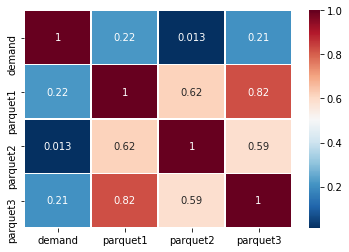

In [25]:
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5);

In [26]:
sc.stats.kendalltau(sdf['parquet1'], sdf['parquet3'],nan_policy='omit')

KendalltauResult(correlation=0.9336260408757597, pvalue=1.534953710007988e-33)

In [27]:
sc.stats.spearmanr(sdf['parquet1'], sdf['parquet2'],nan_policy='omit')

SpearmanrResult(correlation=0.7061171023498057, pvalue=7.903452147443636e-22)

In [28]:
sc.stats.kendalltau(fdf['press1'], fdf['press4'],nan_policy='omit')

KendalltauResult(correlation=1.0, pvalue=1.1314837902432825e-36)

<p><font face="consolas" size="3" color="yellow">
<center><b>*</b></center></font></p>

In [29]:
# 000 situation
fancy = ((sdf['parquet1'] == 0.) & (sdf['parquet2'] == 0.) & (sdf['parquet3'] == 0.))
sdf[fancy]

,a_code,demand,parquet1,parquet2,parquet3


In [30]:
# 001 situation
fancy = ((sdf['parquet1'] == 0.) & (sdf['parquet2'] == 0.) & (sdf['parquet3'] != 0.))
sdf[fancy]

,a_code,demand,parquet1,parquet2,parquet3


In [31]:
# 010 situation
fancy = ((sdf['parquet1'] == 0.) & (sdf['parquet2'] != 0.) & (sdf['parquet3'] == 0.))
sdf[fancy]

,a_code,demand,parquet1,parquet2,parquet3


In [32]:
# 011 situation
fancy = ((sdf['parquet1'] == 0.) & (sdf['parquet2'] != 0.) & (sdf['parquet3'] != 0.))
sdf[fancy]

,a_code,demand,parquet1,parquet2,parquet3


In [33]:
# 100 situation
fancy = ((sdf['parquet1'] != 0.) & (sdf['parquet2'] == 0.) & (sdf['parquet3'] == 0.))
print(len(sdf[fancy].index))
sdf[fancy]

21


,a_code,demand,parquet1,parquet2,parquet3
0,A1,1000.0,362.500000,0.0,0.0
1,A2,1000.0,362.500000,0.0,0.0
2,A3,1000.0,362.500000,0.0,0.0
3,A4,1000.0,362.500000,0.0,0.0
21,A22,4408.0,166.666667,0.0,0.0
22,A23,1596.0,166.666667,0.0,0.0
23,A24,748.0,166.666667,0.0,0.0
24,A25,1427.0,166.666667,0.0,0.0
25,A26,1748.0,166.666667,0.0,0.0
26,A27,900.0,166.666667,0.0,0.0


In [34]:
# 101 situation
fancy = ((sdf['parquet1'] != 0.) & (sdf['parquet2'] == 0.) & (sdf['parquet3'] != 0.))
print(len(sdf[fancy].index))
sdf[fancy]

44


,a_code,demand,parquet1,parquet2,parquet3
5,A6,1799.0,362.500000,0.0,362.500000
6,A7,2000.0,362.500000,0.0,362.500000
8,A9,8875.0,362.500000,0.0,362.500000
9,A10,6496.0,375.000000,0.0,375.000000
10,A11,5065.0,375.000000,0.0,375.000000
11,A12,3798.0,375.000000,0.0,375.000000
12,A10,1000.0,375.000000,0.0,375.000000
14,A15,340.0,250.000000,0.0,250.000000
15,A16,120.0,250.000000,0.0,250.000000
16,A17,360.0,250.000000,0.0,250.000000


In [35]:
# 110 situation
fancy = ((sdf['parquet1'] != 0.) & (sdf['parquet2'] != 0.) & (sdf['parquet3'] == 0.))
sdf[fancy]

,a_code,demand,parquet1,parquet2,parquet3


In [36]:
# 111 situation
fancy = ((sdf['parquet1'] != 0.) & (sdf['parquet2'] != 0.) & (sdf['parquet3'] != 0.))
print(len(sdf[fancy].index))
sdf[fancy]

71


,a_code,demand,parquet1,parquet2,parquet3
61,A62,660.0,375.0,416.666667,375.0
62,A63,1129.0,375.0,416.666667,375.0
63,A64,1346.0,375.0,416.666667,375.0
65,A66,12597.0,375.0,416.666667,375.0
66,A67,2412.0,375.0,416.666667,375.0
67,A68,1769.0,375.0,416.666667,375.0
68,A69,1080.0,375.0,416.666667,375.0
69,A70,1420.1,375.0,416.666667,375.0
70,A66,15000.0,375.0,416.666667,375.0
71,A70,8685.0,375.0,416.666667,375.0


<p><font face="consolas" size="3" color="yellow"><b>_____________________________________________________________________________________________________________________________________________________________________</b>
</font></p>

<p><font face="consolas" size="3" color="yellow">
<center><b>*</b></center></font></p>

In [37]:
fdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 6 columns):
b_code    136 non-null object
demand    136 non-null float64
press1    161 non-null float64
press2    161 non-null float64
press3    161 non-null float64
press4    161 non-null float64
dtypes: float64(5), object(1)
memory usage: 7.7+ KB


<p><font face="consolas" size="3" color="yellow">
<center><b>*</b></center></font></p>

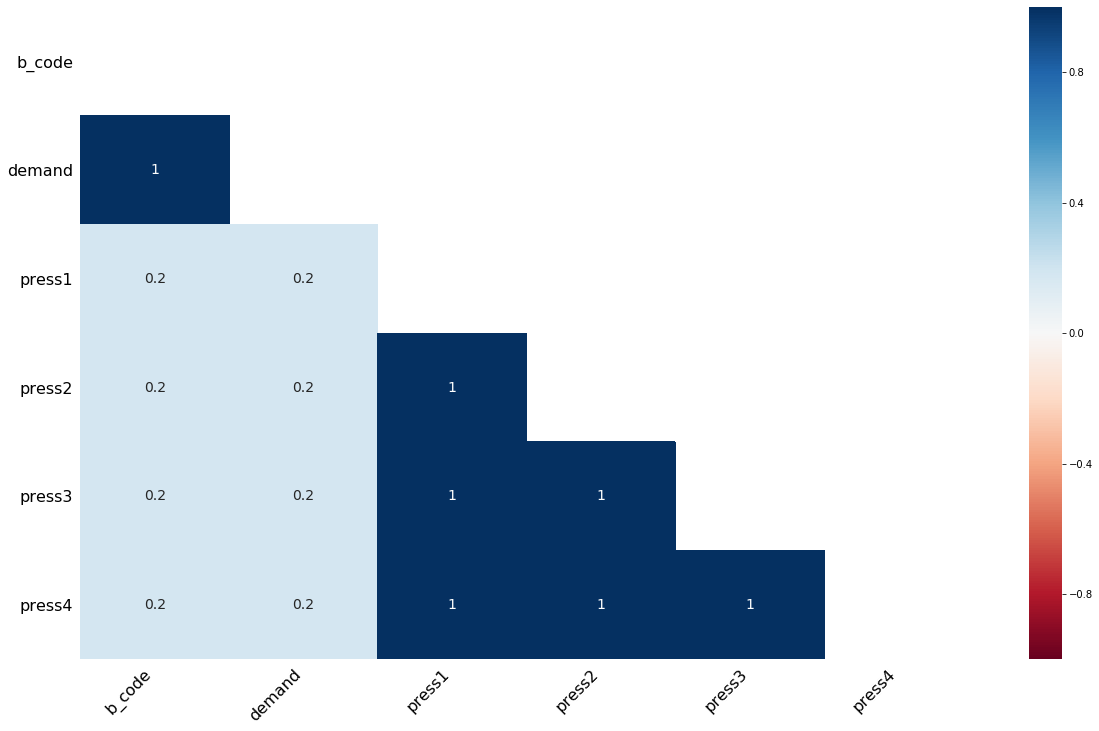

In [38]:
msno.heatmap(fdf);

<p><font face="consolas" size="3" color="yellow">
<center><b>*</b></center></font></p>

In [39]:
fdf.head()

,b_code,demand,press1,press2,press3,press4
0,B1,1000.0,0.0,0.0,333.333333,0.0
1,B2,1000.0,0.0,0.0,333.333333,0.0
2,B3,1000.0,0.0,0.0,333.333333,0.0
3,B4,1000.0,0.0,0.0,333.333333,0.0
4,NaN,NaN,0.0,0.0,0.000000,0.0


In [40]:
fdf.tail()

,b_code,demand,press1,press2,press3,press4
157,B158,1500.0,375.0,250.0,375.0,375.0
158,B159,1500.0,375.0,250.0,375.0,375.0
159,B160,1500.0,375.0,250.0,375.0,375.0
160,B161,1500.0,375.0,250.0,375.0,375.0
161,NaN,NaN,0.0,0.0,0.0,0.0


<p><font face="consolas" size="3" color="yellow">
<center><b>*</b></center></font></p>

In [41]:
fancy = (fdf['b_code'] == 'B142')
fdf['press1'][141] = 375.
fdf['press3'][141] = 375.
fdf['press4'][141] = 375.
fdf[fancy]

,b_code,demand,press1,press2,press3,press4
141,B142,800.0,375.0,0.0,375.0,375.0


<p><font face="consolas" size="3" color="yellow">
<center><b>*</b></center></font></p>

In [42]:
f_product = list(fdf['b_code'].value_counts().index)
s_product = list()
f_product.sort()
counter = 0

for i in range(1,163):
    for j in f_product:
        if j == ('B'+str(i)):
            counter = counter + 1
    if counter != 1:
        s_product.append('B'+str(i))
    counter = 0
    
print(f_product, len(f_product), end='\n\n')
print(s_product, len(s_product))

['B1', 'B10', 'B102', 'B103', 'B11', 'B112', 'B113', 'B117', 'B118', 'B12', 'B129', 'B130', 'B131', 'B132', 'B137', 'B138', 'B139', 'B140', 'B141', 'B142', 'B144', 'B145', 'B148', 'B149', 'B15', 'B150', 'B151', 'B152', 'B153', 'B154', 'B155', 'B156', 'B157', 'B158', 'B159', 'B16', 'B160', 'B161', 'B17', 'B18', 'B2', 'B20', 'B22', 'B23', 'B24', 'B25', 'B26', 'B27', 'B3', 'B34', 'B35', 'B36', 'B39', 'B4', 'B40', 'B42', 'B43', 'B45', 'B49', 'B50', 'B51', 'B52', 'B56', 'B57', 'B58', 'B59', 'B60', 'B62', 'B63', 'B64', 'B66', 'B67', 'B69', 'B70', 'B79', 'B81', 'B84', 'B85', 'B87', 'B9', 'B90', 'B91', 'B92', 'B95', 'B97'] 85

['B5', 'B6', 'B7', 'B8', 'B13', 'B14', 'B19', 'B21', 'B28', 'B29', 'B30', 'B31', 'B32', 'B33', 'B37', 'B38', 'B41', 'B44', 'B46', 'B47', 'B48', 'B53', 'B54', 'B55', 'B61', 'B65', 'B68', 'B71', 'B72', 'B73', 'B74', 'B75', 'B76', 'B77', 'B78', 'B80', 'B82', 'B83', 'B86', 'B88', 'B89', 'B93', 'B94', 'B96', 'B98', 'B99', 'B100', 'B101', 'B104', 'B105', 'B106', 'B107', 'B108'

<p><font face="consolas" size="3" color="yellow">
<center><b>*</b></center></font></p>

In [43]:
fdf.dropna(inplace=True)

<p><font face="consolas" size="3" color="yellow">
<center><b>*</b></center></font></p>

In [44]:
fdf['b_code'].value_counts()

B11     6
B10     6
B20     4
B66     4
B12     4
B64     4
B56     3
B112    3
B113    3
B9      3
B70     3
B97     3
B57     3
B95     3
B36     2
B145    2
B26     2
B15     2
B102    2
B67     2
B3      2
B23     2
B16     2
B81     2
B24     2
B4      2
B69     2
B148    1
B40     1
B131    1
       ..
B90     1
B157    1
B50     1
B85     1
B152    1
B35     1
B153    1
B63     1
B79     1
B60     1
B91     1
B132    1
B139    1
B138    1
B142    1
B159    1
B160    1
B17     1
B45     1
B130    1
B2      1
B87     1
B39     1
B103    1
B92     1
B43     1
B144    1
B118    1
B62     1
B137    1
Name: b_code, Length: 85, dtype: int64

In [45]:
for i in fdf['b_code'].value_counts().index:
    print(fdf.press1[fdf['b_code'] == i]+fdf.press2[fdf['b_code'] == i]+fdf.press3[fdf['b_code'] == i]+fdf.press4[fdf['b_code'] == i])

10     1125.0
73     1375.0
95     1125.0
106    1125.0
114    1125.0
123    1125.0
dtype: float64
9      1125.0
12     1125.0
98     1125.0
105    1125.0
115    1125.0
126    1125.0
dtype: float64
19    333.333333
32    333.333333
45    333.333333
47    333.333333
dtype: float64
65    1375.0
70    1375.0
76    1375.0
82    1375.0
dtype: float64
11     1125.0
74     1375.0
107    1125.0
113    1125.0
dtype: float64
63     1375.0
97     1125.0
109    1125.0
125    1125.0
dtype: float64
55      333.333333
77     1375.000000
100    1125.000000
dtype: float64
111    1125.0
119    1125.0
133    1125.0
dtype: float64
112    1125.0
120    1125.0
134    1125.0
dtype: float64
8      1125.0
93     1125.0
121    1125.0
dtype: float64
69    1375.0
71    1375.0
75    1375.0
dtype: float64
96     1125.0
108    1125.0
124    1125.0
dtype: float64
56     333.333333
67    1375.000000
88    1375.000000
dtype: float64
94     1125.0
110    1125.0
122    1125.0
dtype: float64
35    333.333333
52    333.333

<p><font face="consolas" size="3" color="yellow">
<center><b>*</b></center></font></p>

In [46]:
fancy = (fdf['b_code'] == 'B11')
fdf[fancy]

,b_code,demand,press1,press2,press3,press4
10,B11,5065.0,375.0,0.0,375.0,375.0
73,B11,3000.0,375.0,250.0,375.0,375.0
95,B11,2000.0,375.0,0.0,375.0,375.0
106,B11,2065.0,375.0,0.0,375.0,375.0
114,B11,5008.0,375.0,0.0,375.0,375.0
123,B11,2000.0,375.0,0.0,375.0,375.0


In [47]:
fancy = (fdf['b_code'] == 'B11')
fdf['press2'][73] = 0.
fdf[fancy]

,b_code,demand,press1,press2,press3,press4
10,B11,5065.0,375.0,0.0,375.0,375.0
73,B11,3000.0,375.0,0.0,375.0,375.0
95,B11,2000.0,375.0,0.0,375.0,375.0
106,B11,2065.0,375.0,0.0,375.0,375.0
114,B11,5008.0,375.0,0.0,375.0,375.0
123,B11,2000.0,375.0,0.0,375.0,375.0


In [48]:
fancy = (fdf['b_code'] == 'B12')
fdf[fancy]

,b_code,demand,press1,press2,press3,press4
11,B12,3798.0,375.0,0.0,375.0,375.0
74,B12,2000.0,375.0,250.0,375.0,375.0
107,B12,1798.0,375.0,0.0,375.0,375.0
113,B12,8598.0,375.0,0.0,375.0,375.0


In [49]:
fancy = (fdf['b_code'] == 'B12')
fdf['press2'][74] = 0.
fdf[fancy]

,b_code,demand,press1,press2,press3,press4
11,B12,3798.0,375.0,0.0,375.0,375.0
74,B12,2000.0,375.0,0.0,375.0,375.0
107,B12,1798.0,375.0,0.0,375.0,375.0
113,B12,8598.0,375.0,0.0,375.0,375.0


In [50]:
fancy = (fdf['b_code'] == 'B64')
fdf[fancy]

,b_code,demand,press1,press2,press3,press4
63,B64,1346.0,375.0,250.0,375.0,375.0
97,B64,2000.0,375.0,0.0,375.0,375.0
109,B64,10487.0,375.0,0.0,375.0,375.0
125,B64,2000.0,375.0,0.0,375.0,375.0


In [51]:
fancy = (fdf['b_code'] == 'B64')
fdf['press2'][63] = 0.
fdf[fancy]

,b_code,demand,press1,press2,press3,press4
63,B64,1346.0,375.0,0.0,375.0,375.0
97,B64,2000.0,375.0,0.0,375.0,375.0
109,B64,10487.0,375.0,0.0,375.0,375.0
125,B64,2000.0,375.0,0.0,375.0,375.0


In [52]:
fancy = (fdf['b_code'] == 'B57')
fdf[fancy]

,b_code,demand,press1,press2,press3,press4
56,B57,4500.0,0.0,0.0,333.333333,0.0
67,B57,1769.0,375.0,250.0,375.000000,375.0
88,B57,5000.0,375.0,250.0,375.000000,375.0


In [53]:
fancy = (fdf['b_code'] == 'B57')
fdf['press1'][56] = 375.0
fdf['press2'][56] = 250.0
fdf['press3'][56] = 375.000000
fdf['press4'][56] = 375.0
fdf[fancy]

,b_code,demand,press1,press2,press3,press4
56,B57,4500.0,375.0,250.0,375.0,375.0
67,B57,1769.0,375.0,250.0,375.0,375.0
88,B57,5000.0,375.0,250.0,375.0,375.0


In [54]:
fancy = (fdf['b_code'] == 'B56')
fdf[fancy]

,b_code,demand,press1,press2,press3,press4
55,B56,3000.0,0.0,0.0,333.333333,0.0
77,B56,15000.0,375.0,250.0,375.000000,375.0
100,B56,6724.0,375.0,0.0,375.000000,375.0


In [55]:
fancy = (fdf['b_code'] == 'B56')
fdf['press1'][55] = 375.0
fdf['press3'][55] = 375.000000
fdf['press4'][55] = 375.0
fdf['press2'][77] = 0.
fdf[fancy]

,b_code,demand,press1,press2,press3,press4
55,B56,3000.0,375.0,0.0,375.0,375.0
77,B56,15000.0,375.0,0.0,375.0,375.0
100,B56,6724.0,375.0,0.0,375.0,375.0


<p><font face="consolas" size="3" color="yellow">
<center><b>*</b></center></font></p>

In [56]:
fdf.describe().T

,count,mean,std,min,25%,50%,75%,max
demand,136.0,3585.684559,3331.989730,120.000000,1496.750000,2000.0,4959.5,15526.0
press1,136.0,250.919118,177.101354,0.000000,0.000000,375.0,375.0,375.0
press2,136.0,77.205882,115.929041,0.000000,0.000000,0.0,250.0,250.0
press3,136.0,361.213235,19.677928,333.333333,333.333333,375.0,375.0,375.0
press4,136.0,250.919118,177.101354,0.000000,0.000000,375.0,375.0,375.0


<p><font face="consolas" size="3" color="yellow">
<center><b>*</b></center></font></p>

In [57]:
fdf['demand'].sum()

487653.1

In [58]:
fancy = (fdf['b_code'] == 'B70')
fdf[fancy]

,b_code,demand,press1,press2,press3,press4
69,B70,1420.1,375.0,250.0,375.0,375.0
71,B70,8685.0,375.0,250.0,375.0,375.0
75,B70,6991.0,375.0,250.0,375.0,375.0


<p><font face="consolas" size="3" color="yellow">
<center><b>*</b></center></font></p>

In [59]:
pearsoncorr = fdf.corr()
pearsoncorr

,demand,press1,press2,press3,press4
demand,1.000000,0.235534,0.082672,0.235534,0.235534
press1,0.235534,1.000000,0.470052,1.000000,1.000000
press2,0.082672,0.470052,1.000000,0.470052,0.470052
press3,0.235534,1.000000,0.470052,1.000000,1.000000
press4,0.235534,1.000000,0.470052,1.000000,1.000000


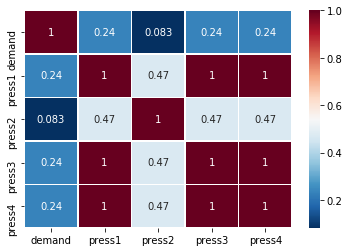

In [60]:
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5);

In [61]:
sc.stats.spearmanr(fdf['press1'], fdf['press3'],nan_policy='omit')

SpearmanrResult(correlation=1.0, pvalue=0.0)

In [62]:
sc.stats.spearmanr(fdf['press2'], fdf['press3'],nan_policy='omit')

SpearmanrResult(correlation=0.47005240505974966, pvalue=7.757425054593926e-09)

In [63]:
sc.stats.kendalltau(fdf['press1'], fdf['press4'],nan_policy='omit')

KendalltauResult(correlation=0.9999999999999999, pvalue=3.301688960793279e-31)

<p><font face="consolas" size="3" color="green"><b>_____________________________________________________________________________________________________________________________________________________________________</b>
</font></p>

<p><font face="consolas" size="3" color="green">
<center><b>*</b></center></font></p>

In [64]:
pearsoncorr = cdf.corr()
pearsoncorr

,demand,parquet1,parquet2,parquet3,press1,press2,press3,press4
demand,1.000000,0.218968,0.013039,0.208548,0.235534,0.082672,0.235534,0.247292
parquet1,0.218968,1.000000,0.618553,0.823123,0.800682,0.376213,0.800682,0.787120
parquet2,0.013039,0.618553,1.000000,0.587598,0.734950,0.607709,0.734950,0.716075
parquet3,0.208548,0.823123,0.587598,1.000000,0.710944,0.331451,0.710944,0.698332
press1,0.235534,0.800682,0.734950,0.710944,1.000000,0.470052,1.000000,0.983621
press2,0.082672,0.376213,0.607709,0.331451,0.470052,1.000000,0.470052,0.477879
press3,0.235534,0.800682,0.734950,0.710944,1.000000,0.470052,1.000000,0.983621
press4,0.247292,0.787120,0.716075,0.698332,0.983621,0.477879,0.983621,1.000000


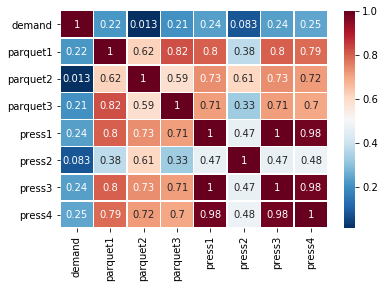

In [65]:
sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5);

In [66]:
sc.stats.spearmanr(cdf['parquet1'], cdf['press1'],nan_policy='omit')

SpearmanrResult(correlation=0.8837436853542917, pvalue=5.0087614745616575e-46)

In [67]:
sc.stats.spearmanr(cdf['parquet1'], cdf['press3'],nan_policy='omit')

SpearmanrResult(correlation=0.8837436853542917, pvalue=5.0087614745616575e-46)

In [68]:
sc.stats.spearmanr(cdf['parquet1'], cdf['press3'],nan_policy='omit')

SpearmanrResult(correlation=0.8837436853542917, pvalue=5.0087614745616575e-46)

<p><font face="consolas" size="3" color="purple"><b>_____________________________________________________________________________________________________________________________________________________________________</b>
</font></p>

In [69]:
"""
0000
0001
0010
0011
0100
0101
0110
0111
1000
1001
1010
1011
1100
1101
1110
1111
"""

'\n0000\n0001\n0010\n0011\n0100\n0101\n0110\n0111\n1000\n1001\n1010\n1011\n1100\n1101\n1110\n1111\n'

In [70]:
# 0000 situation
fancy = ((fdf['press1'] == 0.) & (fdf['press2'] == 0.) & (fdf['press3'] == 0.) & (fdf['press4'] == 0.))
fdf[fancy]

,b_code,demand,press1,press2,press3,press4


In [71]:
# 0001 situation
fancy = ((fdf['press1'] == 0.) & (fdf['press2'] == 0.) & (fdf['press3'] == 0.) & (fdf['press4'] != 0.))
fdf[fancy]

,b_code,demand,press1,press2,press3,press4


In [72]:
# 0010 situation
fancy = ((fdf['press1'] == 0.) & (fdf['press2'] == 0.) & (fdf['press3'] != 0.) & (fdf['press4'] == 0.))
enterance3 = fdf[fancy]
print(len(fdf[fancy].index))
fdf[fancy]

45


,b_code,demand,press1,press2,press3,press4
0,B1,1000.0,0.0,0.0,333.333333,0.0
1,B2,1000.0,0.0,0.0,333.333333,0.0
2,B3,1000.0,0.0,0.0,333.333333,0.0
3,B4,1000.0,0.0,0.0,333.333333,0.0
5,B4,1799.0,0.0,0.0,333.333333,0.0
6,B3,2000.0,0.0,0.0,333.333333,0.0
14,B15,340.0,0.0,0.0,333.333333,0.0
15,B16,120.0,0.0,0.0,333.333333,0.0
16,B17,360.0,0.0,0.0,333.333333,0.0
17,B18,240.0,0.0,0.0,333.333333,0.0


In [73]:
# 0011 situation
fancy = ((fdf['press1'] == 0.) & (fdf['press2'] == 0.) & (fdf['press3'] != 0.) & (fdf['press4'] != 0.))
fdf[fancy]

,b_code,demand,press1,press2,press3,press4


In [74]:
# 0100 situation
fancy = ((fdf['press1'] == 0.) & (fdf['press2'] != 0.) & (fdf['press3'] == 0.) & (fdf['press4'] == 0.))
fdf[fancy]

,b_code,demand,press1,press2,press3,press4


In [75]:
# 0101 situation
fancy = ((fdf['press1'] == 0.) & (fdf['press2'] != 0.) & (fdf['press3'] == 0.) & (fdf['press4'] != 0.))
fdf[fancy]

,b_code,demand,press1,press2,press3,press4


In [76]:
# 0110 situation
fancy = ((fdf['press1'] == 0.) & (fdf['press2'] != 0.) & (fdf['press3'] != 0.) & (fdf['press4'] == 0.))
fdf[fancy]

,b_code,demand,press1,press2,press3,press4


In [77]:
# 0111 situation
fancy = ((fdf['press1'] == 0.) & (fdf['press2'] != 0.) & (fdf['press3'] != 0.) & (fdf['press4'] != 0.))
fdf[fancy]

,b_code,demand,press1,press2,press3,press4


In [78]:
# 1000 situation
fancy = ((fdf['press1'] != 0.) & (fdf['press2'] == 0.) & (fdf['press3'] == 0.) & (fdf['press4'] == 0.))
fdf[fancy]

,b_code,demand,press1,press2,press3,press4


In [79]:
# 1001 situation
fancy = ((fdf['press1'] != 0.) & (fdf['press2'] == 0.) & (fdf['press3'] == 0.) & (fdf['press4'] != 0.))
fdf[fancy]

,b_code,demand,press1,press2,press3,press4


In [80]:
# 1010 situation
fancy = ((fdf['press1'] != 0.) & (fdf['press2'] == 0.) & (fdf['press3'] != 0.) & (fdf['press4'] == 0.))
fdf[fancy]

,b_code,demand,press1,press2,press3,press4


In [81]:
# 1011 situation
fancy = ((fdf['press1'] != 0.) & (fdf['press2'] == 0.) & (fdf['press3'] != 0.) & (fdf['press4'] != 0.))
enterance2 = fdf[fancy]
print(len(fdf[fancy].index))
fdf[fancy]

49


,b_code,demand,press1,press2,press3,press4
8,B9,8875.0,375.0,0.0,375.0,375.0
9,B10,6496.0,375.0,0.0,375.0,375.0
10,B11,5065.0,375.0,0.0,375.0,375.0
11,B12,3798.0,375.0,0.0,375.0,375.0
12,B10,1000.0,375.0,0.0,375.0,375.0
55,B56,3000.0,375.0,0.0,375.0,375.0
63,B64,1346.0,375.0,0.0,375.0,375.0
73,B11,3000.0,375.0,0.0,375.0,375.0
74,B12,2000.0,375.0,0.0,375.0,375.0
77,B56,15000.0,375.0,0.0,375.0,375.0


In [82]:
# 1100 situation
fancy = ((fdf['press1'] != 0.) & (fdf['press2'] != 0.) & (fdf['press3'] == 0.) & (fdf['press4'] == 0.))
fdf[fancy]

,b_code,demand,press1,press2,press3,press4


In [83]:
# 1101 situation
fancy = ((fdf['press1'] != 0.) & (fdf['press2'] != 0.) & (fdf['press3'] == 0.) & (fdf['press4'] != 0.))
fdf[fancy]

,b_code,demand,press1,press2,press3,press4


In [84]:
# 1110 situation
fancy = ((fdf['press1'] != 0.) & (fdf['press2'] != 0.) & (fdf['press3'] != 0.) & (fdf['press4'] == 0.))
fdf[fancy]

,b_code,demand,press1,press2,press3,press4


In [85]:
# 1111 situation
fancy = ((fdf['press1'] != 0.) & (fdf['press2'] != 0.) & (fdf['press3'] != 0.) & (fdf['press4'] != 0.))
enterance1 = fdf[fancy]
print(len(fdf[fancy].index))
fdf[fancy]

42


,b_code,demand,press1,press2,press3,press4
56,B57,4500.0,375.0,250.0,375.0,375.0
61,B62,660.0,375.0,250.0,375.0,375.0
62,B63,1129.0,375.0,250.0,375.0,375.0
65,B66,12597.0,375.0,250.0,375.0,375.0
66,B67,2412.0,375.0,250.0,375.0,375.0
67,B57,1769.0,375.0,250.0,375.0,375.0
68,B69,1080.0,375.0,250.0,375.0,375.0
69,B70,1420.1,375.0,250.0,375.0,375.0
70,B66,15000.0,375.0,250.0,375.0,375.0
71,B70,8685.0,375.0,250.0,375.0,375.0


<p><font face="consolas" size="3" color="white"><b>_____________________________________________________________________________________________________________________________________________________________________</b>
</font></p>

<p><font face="consolas" size="3" color="white">
<center><b>*</b></center></font></p>

In [86]:
enterance1['demand'].sum()

167843.1

In [87]:
enterance2['demand'].sum()

208490.0

In [88]:
enterance3['demand'].sum()

111320.0

<p><font face="consolas" size="3" color="blue"><b>_____________________________________________________________________________________________________________________________________________________________________</b>
</font></p>

<p><font face="consolas" size="3" color="blue">
<center><b>*</b></center></font></p>

In [89]:
# We created five different dataset after data preprocessing.
#fdf.to_excel('fdf.xlsx')
#sdf.to_excel('sdf.xlsx')
#enterance1.to_excel('enterance1.xlsx')
#enterance2.to_excel('enterance2.xlsx')
#enterance3.to_excel('enterance3.xlsx')